In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from tqdm import tqdm
import scipy
import spiceypy as spice
import rebound
import reboundx
import matplotlib
import pandas as pd
import matplotlib

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    14.0
})

[]

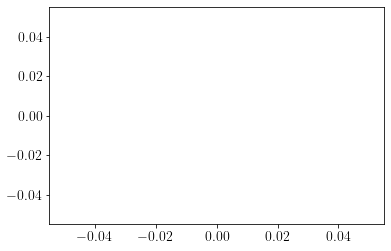

In [2]:
import sys
sys.path.append('..')
from geminids.weights import *
from geminids.beta2mass import asteroidal as asteroidal
from geminids.constants import *
from geminids.cometary_start import init_loc

In [4]:
points_novel = []
points_vel = []
points_distr = []
n = 100
pth = "../output/"
elements_novel = np.zeros((1998,100*n,8))
t = np.arange(1998)

for i in tqdm(range(n)):
    data = np.load(f'{pth}novel/elements{i}.npy')
    beta = np.load(f'{pth}novel/beta{i}.npy')
    size = asteroidal(beta)
    # data = data.reshape(100*1998, 4)
    temp_arr = np.zeros((1998,100,8))
    temp_arr[:,:,:5] = data
    temp_arr[:,:,5] = np.tile(size,1998).reshape(1998,100)
    temp_arr[:,:,6] = np.tile(beta,1998).reshape(1998,100)
    temp_arr[:,:,7] =  np.tile(weight_novel(beta),1998).reshape(1998,100)
    
    
    elements_novel[:,100*i:100*(i+1),:] = temp_arr
    # points_novel.append(np.hstack((data, np.tile(size,1998).reshape(1998,100,1), 
    #                                np.tile(weight_novel(beta),1998).reshape(1998,100,1))))
    
# elements[np.isnan(elements)] = 0
elements_novel[:, np.any(np.isnan(elements_novel[:,:,:]), axis=(0,2)), :] = 0
elements_novel[:, :, 2:5] = elements_novel[:, :, 2:5]/np.pi * 180


100%|██████████| 100/100 [00:37<00:00,  2.65it/s]


In [5]:
n=100
elements_vel = np.zeros((1998,100*n,8))

for i in tqdm(range(n)):
    data = np.load(f'{pth}vel/elements{i}.npy')
    beta = np.load(f'{pth}vel/beta{i}.npy')
    size = asteroidal(beta)
    # data = data.reshape(100*1998, 4)
    temp_arr = np.zeros((1998,100,8))
    temp_arr[:,:,:5] = data
    temp_arr[:,:,5] = np.tile(size,1998).reshape(1998,100)
    temp_arr[:,:,6] = np.tile(beta,1998).reshape(1998,100)
    temp_arr[:,:,7] =  np.tile(weight_vel(beta),1998).reshape(1998,100)
    
    
    elements_vel[:,100*i:100*(i+1),:] = temp_arr
    # points_novel.append(np.hstack((data, np.tile(size,1998).reshape(1998,100,1), 
    #                                np.tile(weight_novel(beta),1998).reshape(1998,100,1))))
    
# elements[np.isnan(elements)] = 0
elements_vel[:, np.any(np.isnan(elements_vel[:,:,:]), axis=(0,2)), :] = 0
elements_vel[:, :, 2:5] = elements_vel[:, :, 2:5]/np.pi * 180


100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


In [3]:
offset = 0
n = 100
pth = "../output/"

orbit = np.load("../data/orig_orbit.npy")
elements_distr = np.zeros((1998,1000*n,8))

for i in tqdm(range(n*10)):
        try:
            data = np.load(f'{pth}distr/elements{i}.npy')
        except Exception as e:
            print(e)
            data *= np.nan
        
        beta = np.load(f'{pth}distr/beta{i}.npy')
        size = asteroidal(beta)
        mask = beta < .5
        size[mask] = asteroidal(beta[mask])
        size[~mask] = 0
        __, r, t = init_loc(int(i/10), orbit)
        t = np.tile(t, 100)
        r = np.tile(r, 100)
        # data = data.reshape(100*1998, 4)
        temp_arr = np.zeros((1998,100,8))
        temp_arr[:,:,:5] = data
        temp_arr[:,:,5] = np.tile(size,1998).reshape(1998,100)
        temp_arr[:,:,6] = np.tile(beta,1998).reshape(1998,100)
        temp_arr[:,:,7] =  np.tile(weight_cometary(beta, r, t),1998).reshape(1998,100)
        elements_distr[:,100*i:100*(i+1),:] = temp_arr
    # points_novel.append(np.hstack((data, np.tile(size,1998).reshape(1998,100,1), 
    #                                np.tile(weight_novel(beta),1998).reshape(1998,100,1))))
    
# elements[np.isnan(elements)] = 0
elements_distr[:, np.any(np.isnan(elements_distr[:,:,:]), axis=(0,2)), :] = 0
elements_distr[:, :, 2:5] = elements_distr[:, :, 2:5]/np.pi * 180

100%|██████████| 1000/1000 [08:01<00:00,  2.08it/s]


|index|element|
|---|---|
| 0 | semi-major axis|
| 1 | eccentricity |
| 2 | inclination |
| 3 | argument of pericenter |
| 4 | longitude of ascending node |
| 5 | mass |
| 6 | beta |
| 7 | weight |


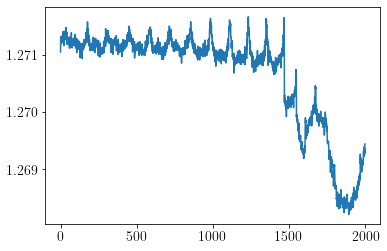

In [ ]:
t = np.arange(1998)


plt.plot(t, elements_novel[:,0,0])

# elements_novel[-1,0,2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


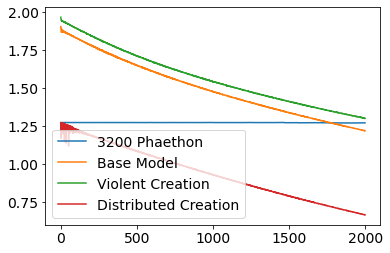

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


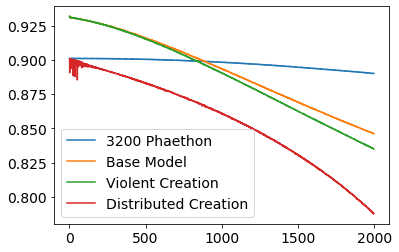

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


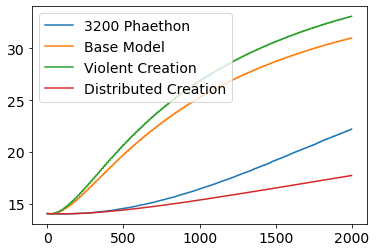

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


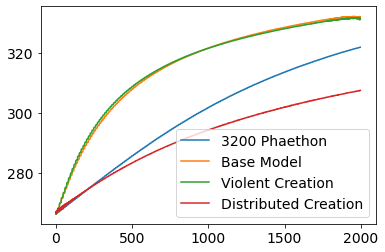

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


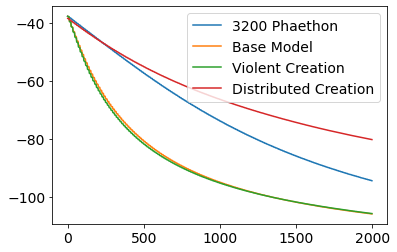

In [6]:
t = np.arange(1998)
index = 0

for index in range (5):
    plt.plot(t, elements_novel[:,0,index], label = "3200 Phaethon")


    mask = np.any(elements_novel[:,:,5] > 1e-8, axis = 0) * np.any(elements_novel[:,:,5] > 1e-10, axis = 0)
    plt.plot(t[1:], np.sum(elements_novel[1:,mask,index] * elements_novel[1:,mask,7], axis = 1) / np.sum(elements_novel[1:,mask,7], axis=1), label = "Base Model")

    mask = np.any(elements_vel[:,:,5] > 1e-8, axis = 0) * np.any(elements_vel[:,:,5] > 1e-10, axis = 0)
    plt.plot(t[1:], np.sum(elements_vel[1:,mask,index] * elements_vel[1:,mask,7], axis = 1) / np.sum(elements_vel[1:,mask,7], axis=1), label="Violent Creation" )

    mask = np.any(elements_distr[:,:,5] > 1e-8, axis = 0) * np.any(elements_distr[:,:,5] > 1e-10, axis = 0)
    plt.plot(t[1:], np.sum(elements_distr[1:,mask,index] * elements_distr[1:,mask,7], axis = 1) / np.sum(elements_distr[1:,mask,7], axis=1), label ="Distributed Creation" )
    plt.legend()

    plt.savefig(f"../figures/elements_{index}.eps")
    plt.show()

In [8]:
t = np.arange(1998)

index = 1


In [9]:
t = np.arange(1998)

index = 1


In [10]:
plt.scatter(elements[-1,:,5],np.log10(elements[-1,:,0]))


NameError: name 'elements' is not defined

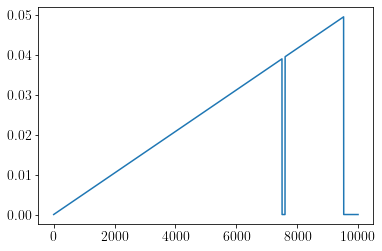

In [10]:
plt.plot(np.arange(elements_novel[-1, :, 6].shape[0]), elements_novel[-1,:,6])

In [70]:
elements_novel[-1, :, 6].max()

0.04952999999999999

In [25]:
elements_novel[-1,:,4].min()

-133.56057551856148

In [37]:
def plot_mass_semi_major(elements):
    fig, ax = plt.subplots()
    mask = elements[-1, :, 5]>0
    ax.scatter(elements[-1, mask, 6], elements[-1,mask,0]/elements[-1, 0, 0],s=1)
    
    # forward = lambda x: np.interp(x, np.log10(elements[-1, mask, 5]), elements[-1, mask, 6])
    # backwards = lambda x: np.interp(x, elements[-1, mask, 6], np.log10(elements[-1, mask, 5]))
    
    plt.yscale("log")
    plt.xlabel("beta")
    plt.ylabel("final semi major axis")
    # secax = ax.secondary_xaxis("top", functions=(backwards, forward))
    # secax.set_xticklabels(secax.get_xticks(), rotation = 45)

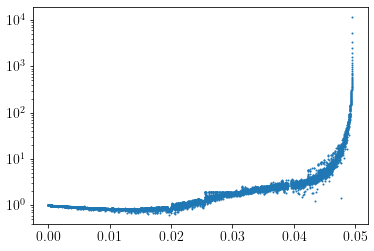

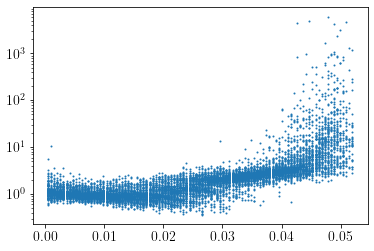

In [35]:
plot_mass_semi_major(elements_novel)
plot_mass_semi_major(elements_vel)

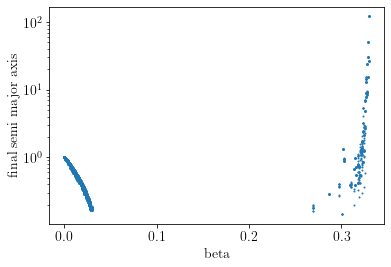

In [38]:
# plot_mass_semi_major(elements_novel)
# plot_mass_semi_major(elements_vel)
plot_mass_semi_major(elements_distr)

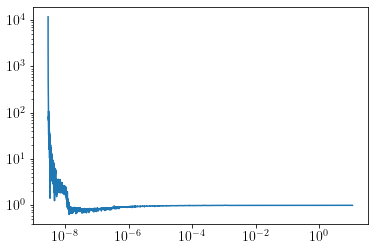

In [33]:
mask = elements_novel[-1, :, 5]>0
plt.plot(elements_novel[-1, mask, 5], elements_novel[-1,mask,0]/elements_novel[-1, 0, 0])
plt.xscale("log")
plt.yscale("log")


mask = elements_vel[-1, :, 5]>0
plt.plot(elements_vel[-1, mask, 5], elements_vel[-1,mask,0]/elements_novel[-1, 0, 0])
plt.xscale("log")
plt.yscale("log")

mask = elements_[-1, :, 5]>0
plt.plot(elements_novel[-1, mask, 5], elements_novel[-1,mask,0]/elements_novel[-1, 0, 0])
plt.xscale("log")
plt.yscale("log")

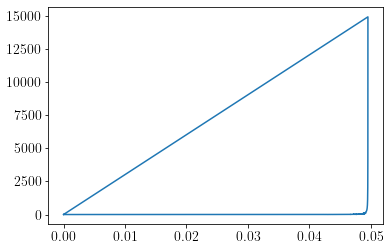

In [8]:
plt.plot(elements_novel[-1, :, 6], elements_novel[-1, :, 0])
# plt.xscale("log")

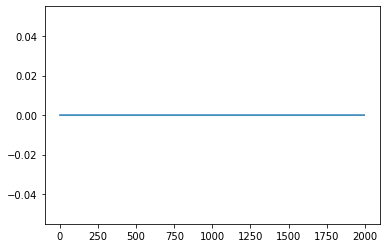

In [ ]:
plt.plot(t, elements[:,-2,6])

In [ ]:
plt.plot()

array([0.48490732, 0.48490732, 0.48490732, ..., 0.48490732, 0.48490732,
       0.48490732])

In [ ]:
np.any(mask, axis=0).shape

(10000,)

In [ ]:
np.sum(elements[:,:,0][mask])

nan

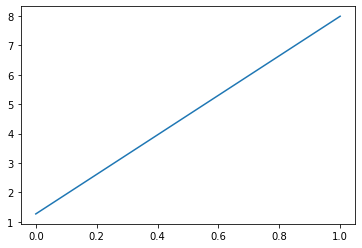

In [ ]:
mask = np.any(elements[:,:,4] > 1e-8, axis = 1)
t = np.arange(1998)


np.sum(elements[:,:,0] * elements[:,:,6], axis=1) / np.sum(elements[:,:,6], axis=1)

plt.plot(t, np.sum(elements[:,:,0][mask] * elements[:,:,6][mask], axis=1) / np.sum(elements[:,:,6][mask], axis=1))

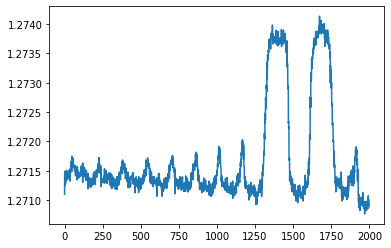

In [ ]:
plt.plot(t, elements[:,0,0])

In [ ]:
data.shape

(1998, 100, 4)

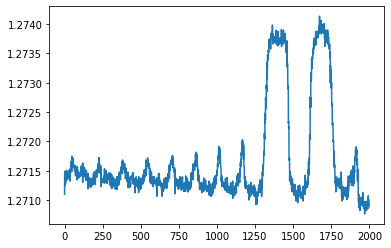

In [ ]:
data.shape
plt.plot(t, data[:,0,0])

In [13]:
offset = 0
n = 100
pth = "../output/"

orbit = np.load("../data/orig_orbit.npy")
elements_distr = np.zeros((1998,1000*n,9))

for i in tqdm(range(n*10)):
        try:
            data = np.load(f'{pth}distr/elements{i}.npy')
        except Exception as e:
            print(e)
            data = data*np.nan
        beta = np.load(f'{pth}distr/beta{i}.npy')
        size = asteroidal(beta)
        mask = beta < .5
        __, r, t = init_loc(int(i/10), orbit)
        t = np.tile(t, 100)
        r = np.tile(r, 100)
        # data = data.reshape(100*1998, 4)
        temp_arr = np.zeros((1998,100,9))
        temp_arr[:,:,:5] = data
        temp_arr[:,:,5] = np.tile(size,1998).reshape(1998,100)
        temp_arr[:,:,6] = np.tile(beta,1998).reshape(1998,100)
        temp_arr[:,:,7] =  np.tile(weight_cometary(beta, r, t),1998).reshape(1998,100)
        temp_arr[:,:,8] = np.tile(r,1998).reshape(1998,100)
        elements_distr[:,100*i:100*(i+1),:] = temp_arr
    # points_novel.append(np.hstack((data, np.tile(size,1998).reshape(1998,100,1), 
    #                                np.tile(weight_novel(beta),1998).reshape(1998,100,1))))
    
# elements[np.isnan(elements)] = 0
# elements_distr[:, np.any(np.isnan(elements_distr[:,:,:]), axis=(0,2)), :] = 0
elements_distr[:, :, 2:5] = elements_distr[:, :, 2:5]/np.pi * 180

 68%|██████▊   | 680/1000 [04:39<02:12,  2.42it/s]

[Errno 2] No such file or directory: '../output/distr/elements680.npy'


 69%|██████▉   | 690/1000 [04:43<02:07,  2.44it/s]

[Errno 2] No such file or directory: '../output/distr/elements690.npy'


 71%|███████   | 710/1000 [04:51<01:58,  2.45it/s]

[Errno 2] No such file or directory: '../output/distr/elements710.npy'


 71%|███████   | 711/1000 [04:52<02:00,  2.40it/s]

[Errno 2] No such file or directory: '../output/distr/elements711.npy'


 72%|███████▏  | 720/1000 [04:56<01:57,  2.38it/s]

[Errno 2] No such file or directory: '../output/distr/elements720.npy'


 76%|███████▌  | 755/1000 [05:10<01:40,  2.43it/s]

[Errno 2] No such file or directory: '../output/distr/elements755.npy'


100%|██████████| 1000/1000 [06:52<00:00,  2.42it/s]


In [72]:
i = 1997
np.sum(np.isnan(elements_distr)[i,:,2])/np.sum(~np.isnan(elements_distr)[i,:,2])

6.194244604316546

In [14]:
survival_time = np.sum(~np.isnan(elements_distr)[:,:,2], axis = 0)

In [59]:
survival_time.min()

481

Text(0, 0.5, 'beta')

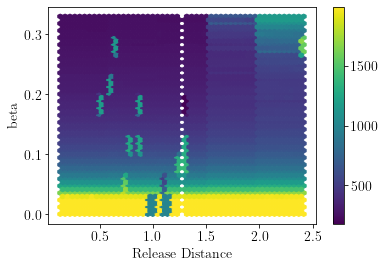

In [20]:
poly = plt.hexbin(elements_distr[0,:,8], elements_distr[0,:,6], C=survival_time, reduce_C_function=np.mean, gridsize = 50)
plt.colorbar()

plt.xlabel("Release Distance")
plt.ylabel("beta")

Text(0, 0.5, '\\% of survivors')

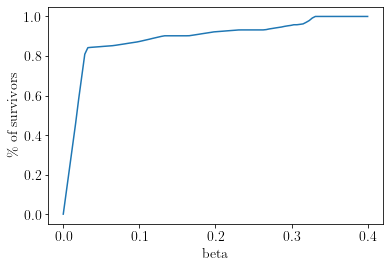

In [31]:
xs = np.linspace(0, 0.4, 100)
plt.plot(xs, [sum(elements_distr[0,mask,6] < x)/sum(elements_distr[0,mask,6] < 1) for x in xs])
plt.xlabel("beta")
plt.ylabel("\% of survivors")

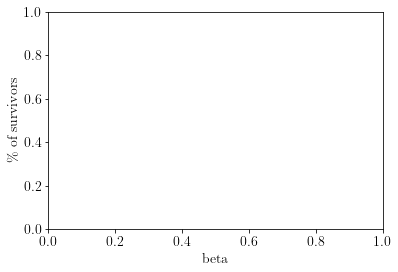

In [29]:

plt.show()

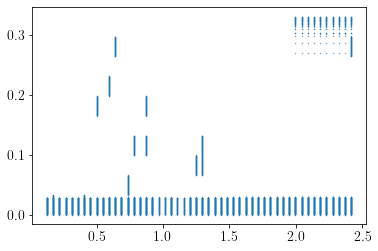

In [24]:
mask = survival_time > 1997
plt.scatter(elements_distr[0,mask,8], elements_distr[0,mask,6], s=0.1)

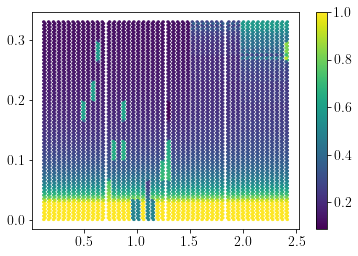

In [16]:
plt.hexbin(elements_distr[0,:,8], elements_distr[0,:,6], C=survival_time/1998, reduce_C_function=np.mean)
plt.colorbar()

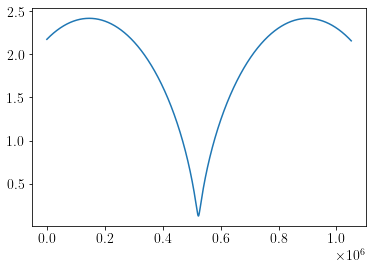

In [100]:
r = np.sqrt(orbit[:,0]**2 + orbit[:,1]**2 + orbit[:,2]**2)
t = np.arange(len(r))


plt.plot(t, r)


In [96]:
orbit = np.load("../data/orig_orbit.npy")


In [98]:
orbit.shape

(1051200, 6)